<Axes: xlabel='balance', ylabel='income'>

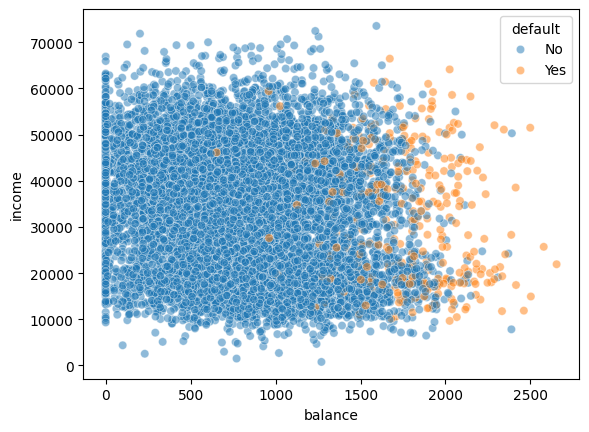

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/Default.csv")
df.head()

sns.scatterplot(data=df, x="balance", y="income", hue="default", alpha=0.5)

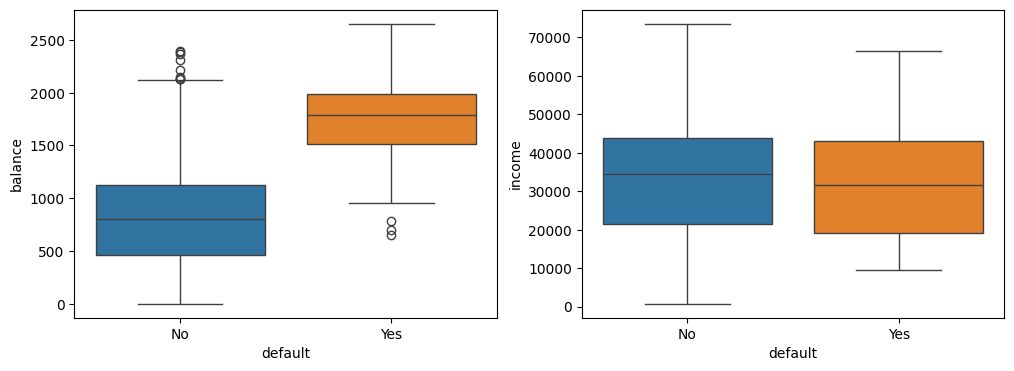

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for ax, column in zip(ax, ["balance", "income"]):
    sns.boxplot(data=df, x="default", y=column, hue="default", ax=ax)

In [43]:
pd.get_dummies(df, columns=["default", "student"], dtype=int).head()

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,1,0,1,0
1,817.180407,12106.134700,1,0,0,1
2,1073.549164,31767.138947,1,0,1,0
3,529.250605,35704.493935,1,0,1,0
4,785.655883,38463.495879,1,0,1,0


In [44]:
df = pd.get_dummies(df, columns=["default", "student"], drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [45]:
X, y = df.drop("default_Yes", axis="columns"), df["default_Yes"]
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LogisticRegressionCV(penalty="l2", cv=10)

model.fit(scaled_X_train, Y_train)
model.intercept_, model.coef_

(array([-6.19131104]), array([[ 2.79774904,  0.0631535 , -0.22822624]]))

In [46]:
Y_hat = model.predict(scaled_X_test)
Y_hat

array([False, False, False, ..., False, False, False])

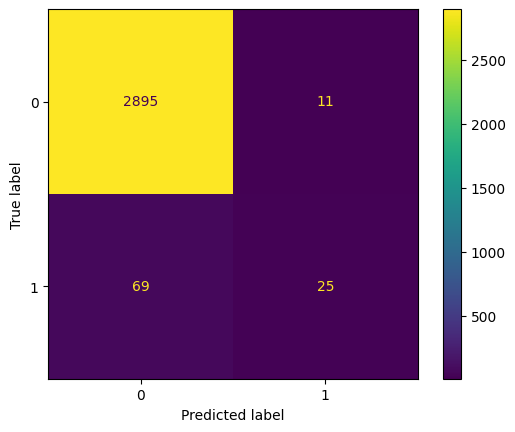

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, Y_hat)
display = ConfusionMatrixDisplay(cm)

display.plot()

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2906
        True       0.69      0.27      0.38        94

    accuracy                           0.97      3000
   macro avg       0.84      0.63      0.69      3000
weighted avg       0.97      0.97      0.97      3000

